In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from nltk import bigrams
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stoplist = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
data=pd.read_csv("/content/drive/My Drive/Public_Sentiment_Data/Sentiment_Data.csv")
data.head(10)

,retweetcount,text,sentiment,hashtags
0,0,✅ ACC ✅\n\nAcc can give Good Breakdown in comi...,positive,[]
1,0,So Pakistan just admitted what India has been ...,neutral,[]
2,0,The nationwide lockdown in India which was to ...,negative,[]
3,0,COVID 19 cases in India until 250620 2030\n\n...,positive,[]
4,2,A Watch Worth 385 CroresFacts About 5M Luxury ...,positive,[]
5,2,States of india and their capitals\nLINK\nIndi...,neutral,[]
6,1,Total confirmed COVID19 cases in Telangana Ind...,positive,[]
7,3,CBSE Board Exams 20 CBSE board exams for class...,negative,[]
8,0,NEW DesilandNA How has India managed the COVID...,positive,[]
9,0,Indian TV media should shift its base to Pakis...,positive,[]


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18222 entries, 0 to 18221
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   retweetcount  18222 non-null  object
 1   text          18222 non-null  object
 2   sentiment     18222 non-null  object
 3   hashtags      18222 non-null  object
dtypes: object(4)
memory usage: 569.6+ KB


In [126]:
ext_data = pd.read_csv("/content/drive/My Drive/Public_Sentiment_Data/Sentiment_Extraction_Data.csv")
ext_data = ext_data.rename(columns={"selected_text":"extracted_tweet"})
ext_data.head()

,retweetcount,text,sentiment,extracted_tweet,hashtags
0,0,✅ ACC ✅\n\nAcc can give Good Breakdown in comi...,positive,good,[]
1,0,So Pakistan just admitted what India has been ...,neutral,so pakistan just admitted what india has been...,[]
2,0,The nationwide lockdown in India which was to ...,negative,lockdown,[]
3,0,COVID 19 cases in India until 250620 2030\n\n...,positive,recovered 277765 6077 deaths 15042 135🙏🏼,[]
4,2,A Watch Worth 385 CroresFacts About 5M Luxury ...,positive,a watch worth 385 croresfacts about 5m luxury...,[]


In [127]:
data.sentiment.value_counts()

positive    8973
neutral     6335
negative    2914
Name: sentiment, dtype: int64

In [128]:
df = data.sentiment.value_counts()
size=list(df.values)
names=list(df.index)
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=names, values=size,hole=0.6)])
fig.show()

In [129]:
fig = go.Figure(go.Funnelarea(
      values = df.values, text = ["Positive","Neutral","Negative"],
      marker = {"colors": ["deepskyblue", "lightsalmon", "tan"],
      
              "line": {"color": ["wheat", "wheat", "wheat"]}},
                 title = {"position": "top center", "text": "Sentiment levels"}))
fig.show()   

In [130]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
df_new = pd.DataFrame(dict(
    r=list(df.values),
    theta=list(df.index)))
plt.figure(figsize=(10,10))
fig = px.line_polar(df_new, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()


<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



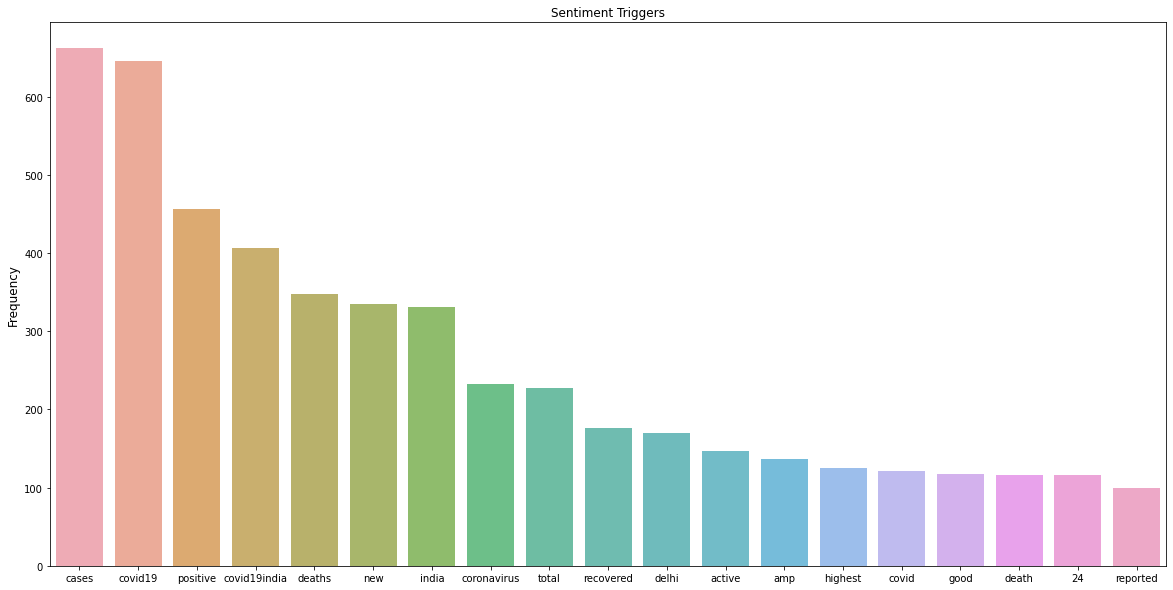

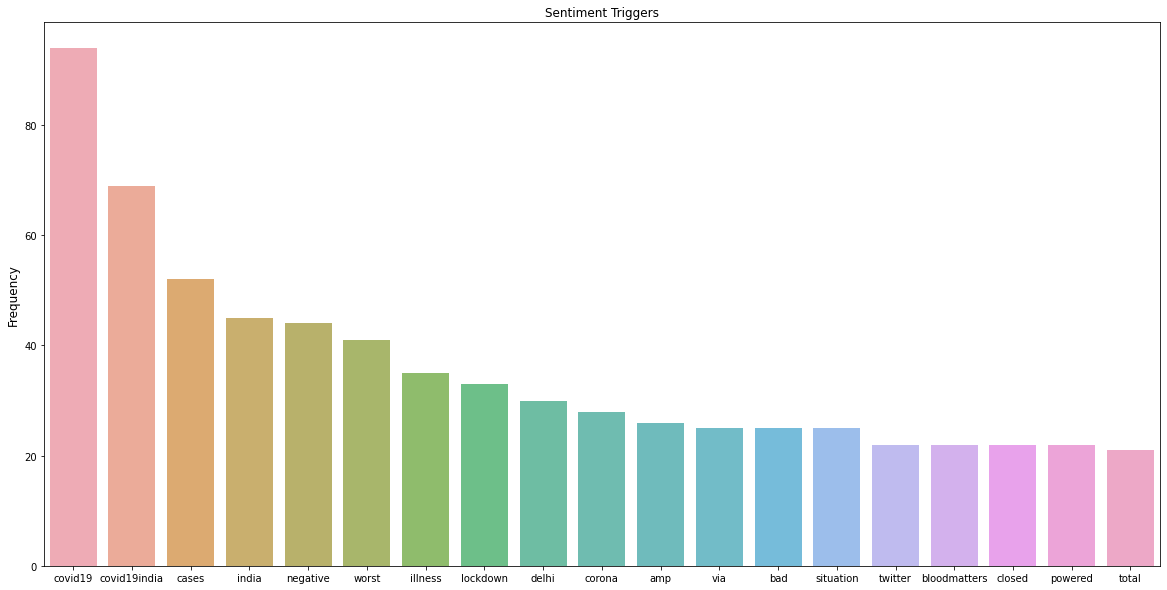

In [131]:
ext_data = ext_data[ext_data['sentiment']!="neutral"]
df = ext_data.sentiment.value_counts()
for i in range(0,2):
    Analysis_Data = ext_data
    ext_data["extracted_tweet"]=ext_data["extracted_tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
    Sentiment = Analysis_Data[Analysis_Data['sentiment'] == df.index[i]]#Creating the dataframe of having same sentiment
    Word_frequency = pd.Series(' '.join(Sentiment.extracted_tweet).split()).value_counts()[:20]#Calculating the words frequency
    plt.figure(figsize=(20,10))
    plt.ylabel("Frequency",fontsize=12)
    plt.title("Sentiment Triggers")
    sns.barplot(Word_frequency.index[1:],Word_frequency.values[1:],alpha=0.8)
    plt.savefig("/content/drive/My Drive/Public_Sentiment_Data/Images/wordfrequency_"+df.index[i]+".png")


In [132]:
import collections
ext_data_negative = ext_data[ext_data["sentiment"]=='negative']
ext_data_positive = ext_data[ext_data["sentiment"]=='positive']
bigrams = [b for l in ext_data_positive.extracted_tweet for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df_positive = pd.DataFrame(bigram_counts.most_common(60),
                             columns=['bigram', 'frequency'])
bigrams = [b for l in ext_data_negative.extracted_tweet for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df_negative = pd.DataFrame(bigram_counts.most_common(80),
                             columns=['bigram', 'frequency'])


In [133]:
import networkx as nx
import matplotlib.pyplot as plt
# Create network plot 
G=nx.grid_2d_graph(2,2)

pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100)
fig,ax = plt.subplots(figsize=(50,30)) 
d = bigram_df_negative.set_index('bigram').T.to_dict('records')
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100) 
  
nx.draw_networkx(G, pos,arrows=True,
                 font_size=16,
                 width=4,
                 edge_color='#e25a4b',
                 node_size=500,with_labels = True)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,bbox=dict(facecolor='#ffcd94', alpha=0.4),
            horizontalalignment='center', fontsize=35)
plt.savefig("/content/drive/My Drive/Public_Sentiment_Data/Images/ext_negative.png")   
fig,ax  = plt.subplots(figsize=(50,30))

d = bigram_df_positive.set_index('bigram').T.to_dict('records')
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100) 
  
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=4,
                 edge_color='#999894',
                 node_size=500,
                 with_labels = True)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,bbox=dict(facecolor='#7c99d0', alpha=0.4),
            horizontalalignment='center', fontsize=35)
plt.savefig("/content/drive/My Drive/Public_Sentiment_Data/Images/ext_positive.png")     
plt.show()
    

Output hidden; open in https://colab.research.google.com to view.

In [134]:
for i in range(len(bigram_df_positive.bigram)):
  bigram_df_positive.bigram[i] = list(bigram_df_positive.bigram[i])
  bigram_df_positive.bigram.to_csv("/content/drive/My Drive/Public_Sentiment_Data/listbigram_positive.csv")
for i in range(len(bigram_df_negative.bigram)):
  bigram_df_negative.bigram[i] = list(bigram_df_negative.bigram[i])
  bigram_df_negative.bigram.to_csv("/content/drive/My Drive/Public_Sentiment_Data/listbigram_negative.csv")  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



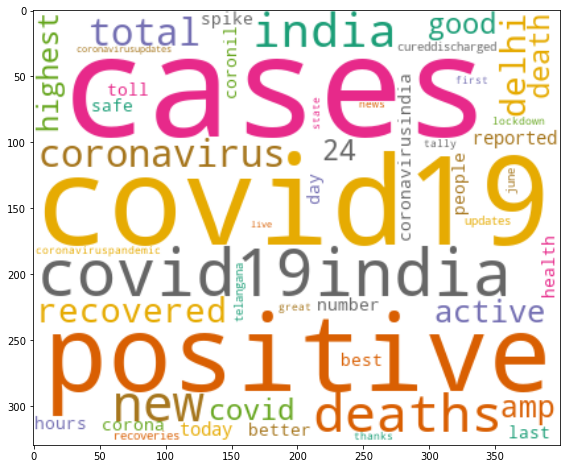

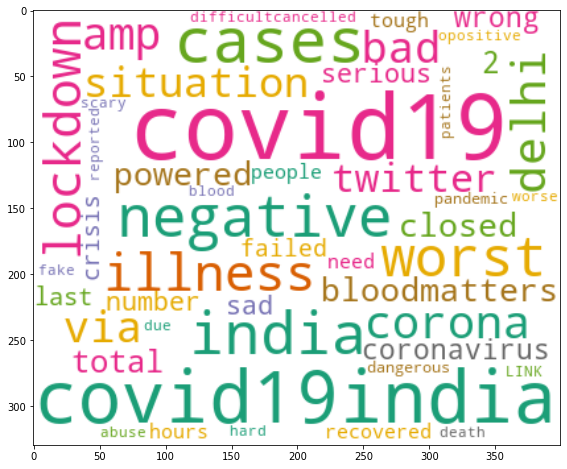

In [135]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2",background_color='white', collocations=False).generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
for i in range(0,2):
    Analysis_Data = ext_data
    ext_data["extracted_tweet"]=ext_data["extracted_tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
    Sentiment = Analysis_Data[Analysis_Data['sentiment'] == df.index[i]]#Creating the dataframe of having same sentiment
    Word_frequency = pd.Series(' '.join(Sentiment.extracted_tweet).split()).value_counts()[:50]#Calculating the words frequency
    generate_wordcloud(Word_frequency.sort_values(ascending=False)[1:],data.index[i])
    plt.savefig("/content/drive/My Drive/Public_Sentiment_Data/Images/Wordcloud_" +df.index[i]+" .png")   
    

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



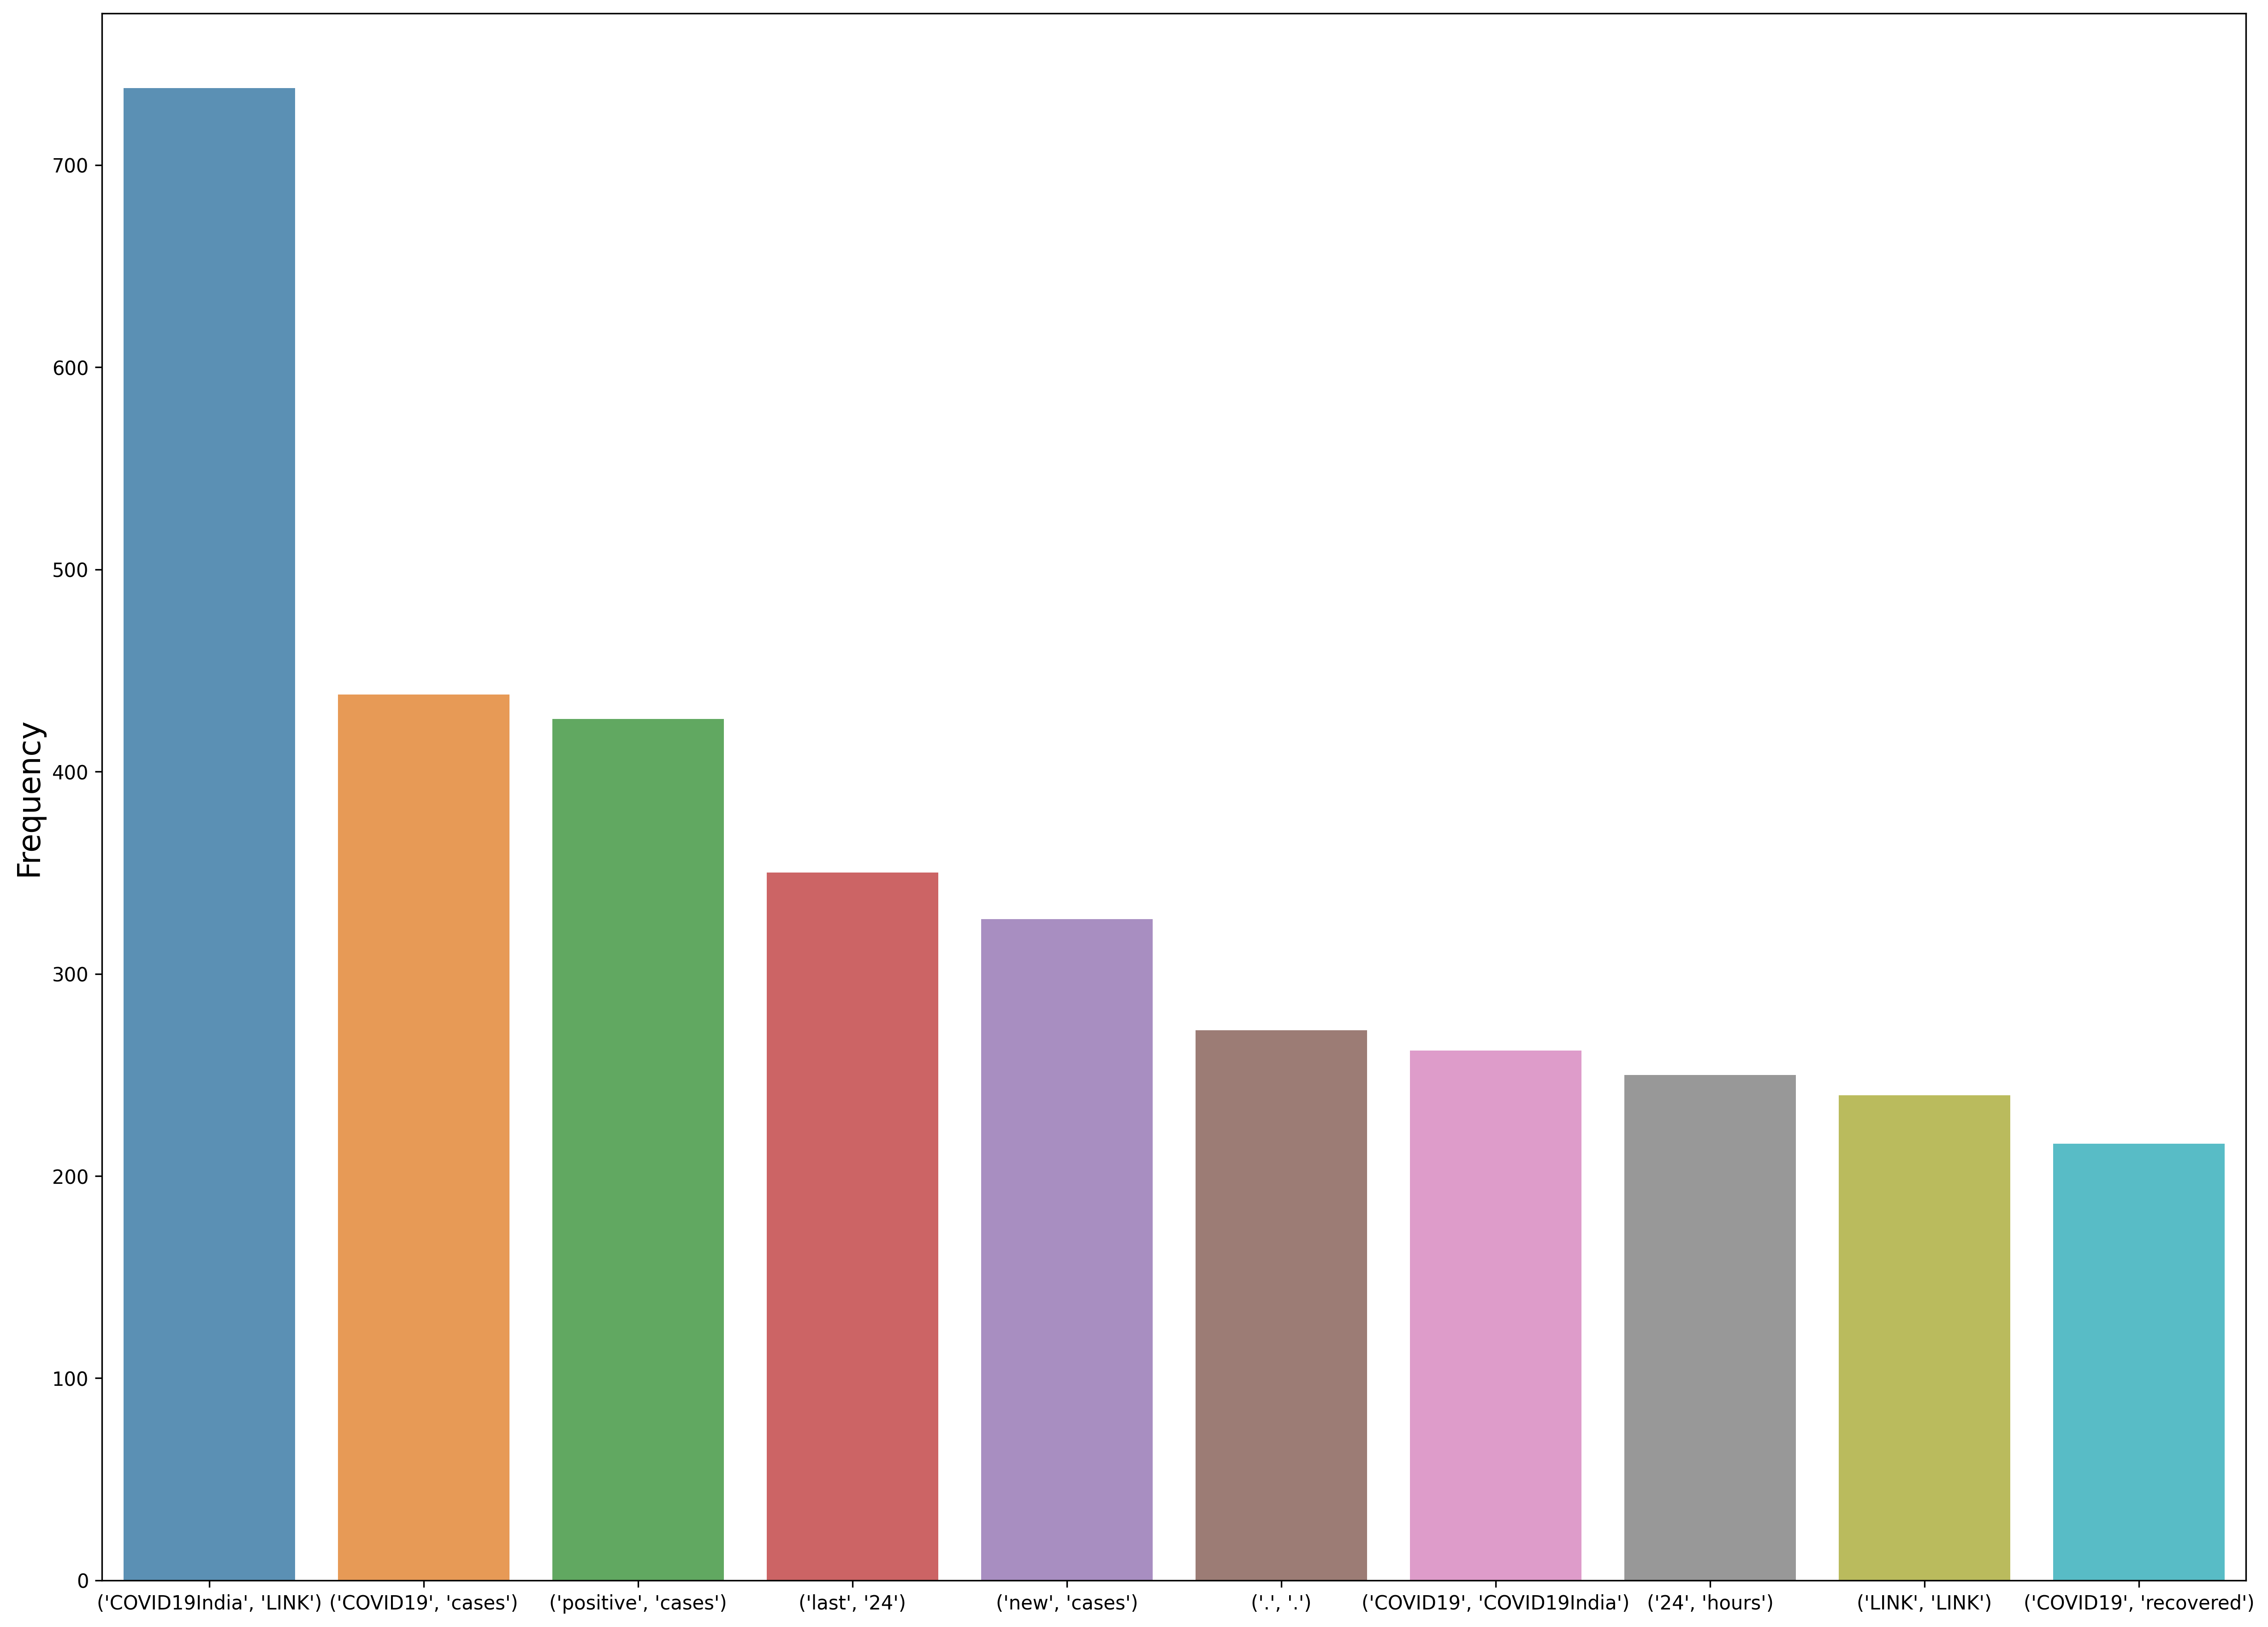

In [136]:
 import collections
data["text"]=data["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
bigrams = [b for l in data.text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(10),columns=['bigram', 'frequency'])
fig, ax = plt.subplots(1, 1, figsize = (20, 15), dpi=300)
sns.barplot(bigram_df.bigram,bigram_df.frequency,alpha=0.8)
plt.ylabel("Frequency",fontsize=16)
ax.set_xlabel('')
plt.savefig("/content/drive/My Drive/Public_Sentiment_Data/Images/bigram_frequency.png")

In [137]:
import collections
data["text"]=data["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
bigrams = [b for l in data.text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(200),columns=['bigram', 'frequency'])
bigram_data = bigram_df
bigram_data["word1"] = bigram_data["bigram"].apply(lambda x: x[0])
bigram_data["word2"] = bigram_data["bigram"].apply(lambda x: x[1])
bigram_data.drop(["bigram"],axis = 1,inplace = True)
bigram_data.rename({"frequency":"n"}, axis=1, inplace = True) 
bigram_data = bigram_data[["word1","word2","n"]]
bigram_data.to_csv("/content/drive/My Drive/Public_Sentiment_Data/R_data.csv",index=False)

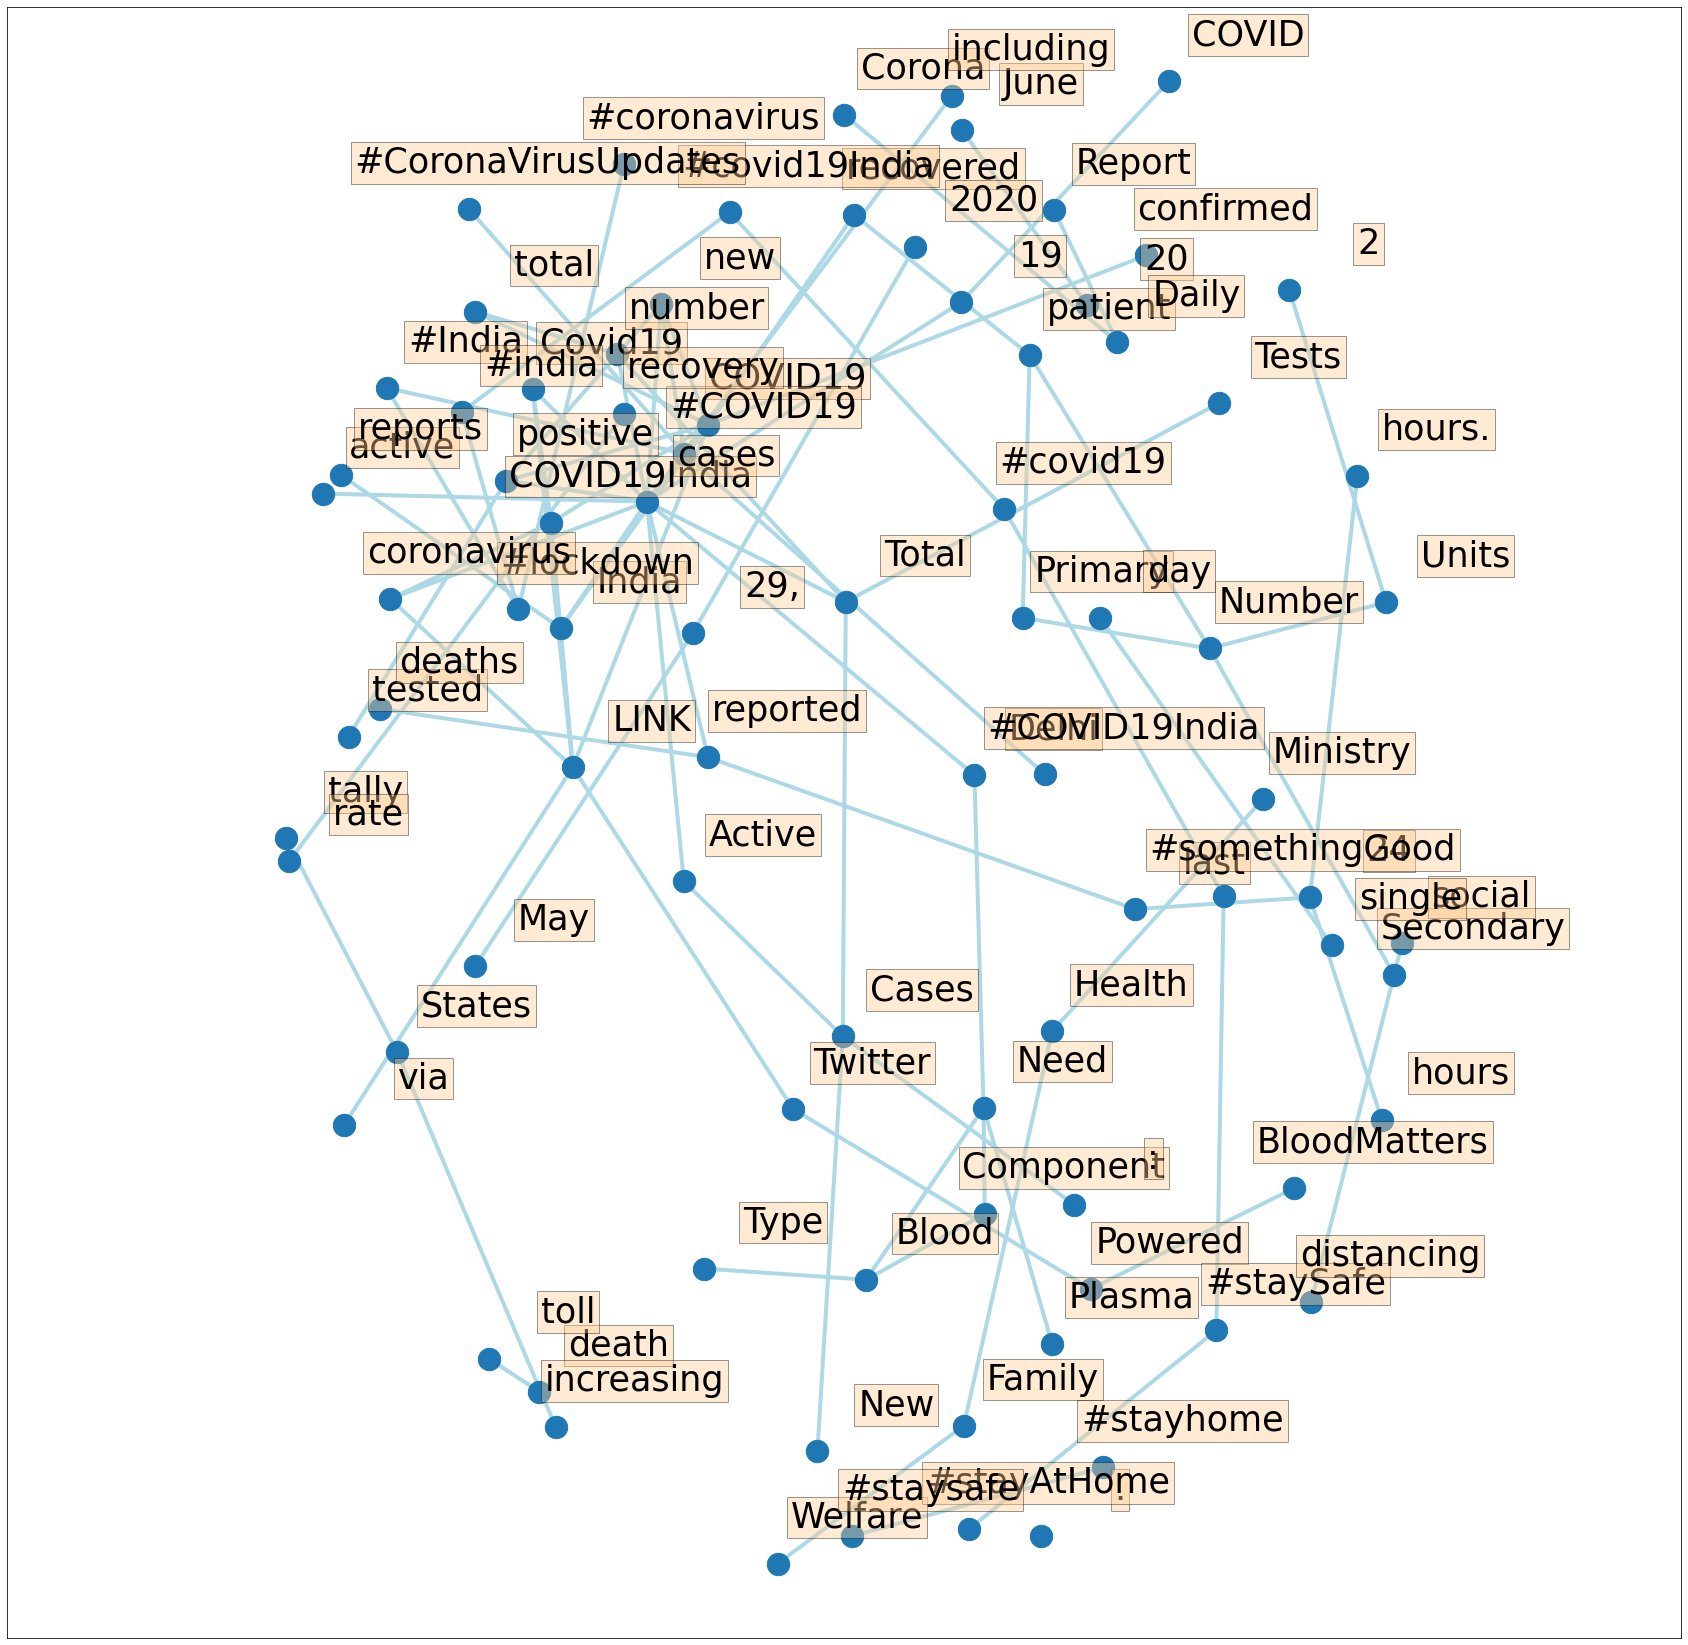

In [138]:
import collections
bigrams = [b for l in data.text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'frequency'])
import networkx as nx
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100)
fig,ax = plt.subplots(figsize=(30,30))
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=4,
                 edge_color='lightblue',
                 node_size=500,
                 with_labels = False,
                 ax=ax)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)


# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,bbox=dict(facecolor='#ffcd94', alpha=0.4),
            horizontalalignment='center', fontsize=35)
plt.savefig('/content/drive/My Drive/Public_Sentiment_Data/Images/network_1_python')
plt.show()   


In [139]:
for i in range(len(bigram_df.bigram)):
 bigram_df.bigram[i] = list(bigram_df.bigram[i])
bigram_df.bigram.to_csv("/content/drive/My Drive/listbigram.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
import plotly.express as px
fig = px.box(data, y="retweetcount",points="all")

fig.update_layout(
    yaxis_title="Retweet Count",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [141]:
import plotly.express as px
fig = px.box(data, y="sentiment",points="all")

fig.update_layout(
    
    yaxis_title="Sentiment",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [142]:
hashtag_data = pd.DataFrame(columns=['hashtag','retweet_count'])
for i in range(len(data.hashtags)):
  text = data.hashtags[i]
  text = text.replace('[','')
  text = text.replace(']','')
  text = text.replace(',','')
  text = text.replace("'", "")
  x = text.split()
  for string in x:
    hashtag_data.loc[len(hashtag_data)] = [string, data.retweetcount[i]]

In [143]:
hashtag_data

,hashtag,retweet_count
0,Law,0
1,Latest,0
2,LatestLaws,0
3,LegalNews,0
4,India,0
...,...,...
80339,#Hanuman,10
80340,#CP,10
80341,#Unlock1,10
80342,#unlock1,0


In [144]:
hashtag_data = hashtag_data.sort_values(by = ["retweet_count"],ascending=False)

In [145]:
hashtag_data

,hashtag,retweet_count
4949,hashtags,retweetcount
22906,Telangana,99
22905,CoronaVirus,99
22907,KCR,99
22904,COVID19,99
...,...,...
31080,#Lockdown,0
31081,#Covid,0
31082,#Coronavirus,0
31083,#RossariBiotechLimited,0


In [146]:
hashtag_data[0]

KeyError: ignored

In [147]:
hashtag_data = hashtag_data.groupby(['hashtag'],as_index = False).agg({'retweet_count': 'sum'})
hashtag_data.to_csv("/content/drive/My Drive/Public_Sentiment_Data/hashtag.csv",index=False)
hashtag_data = hashtag_data[:5000]

In [148]:
hashtag_data

,hashtag,retweet_count
0,#100DaysOfCode,20
1,#100bijnor,0
2,#100wordsofsolitude,7
3,#10daystogo,0
4,#1200billion,0
...,...,...
495,#BENGAL,0
496,#BENGALURU,0
497,#BEST,20
498,#BFSI,1


In [149]:
hashtag_data['retweet_count'] =  pd.to_numeric(hashtag_data['retweet_count'],errors='coerce')
hashtag_data

,hashtag,retweet_count
0,#100DaysOfCode,20.0
1,#100bijnor,0.0
2,#100wordsofsolitude,7.0
3,#10daystogo,0.0
4,#1200billion,0.0
...,...,...
495,#BENGAL,0.0
496,#BENGALURU,0.0
497,#BEST,20.0
498,#BFSI,1.0


In [119]:
hashtag_data = hashtag_data[(hashtag_data["retweet_count"] <= 50) & (hashtag_data["retweet_count"] >= 100000)]
#hashtag_data.drop(hashtag_data , inplace=True)

In [150]:
hashtag_data = hashtag_data.sort_values(by = ["retweet_count"],ascending=False)
hashtag_data

,hashtag,retweet_count
240,#Ahmedabad,7.332322e+30
431,#Assam,7.406422e+29
320,#Amphan,7.633242e+26
340,#AndhraPradesh,6.641210e+22
389,#ArnabGoswami,8.211111e+20
...,...,...
203,#AbuDhabi,0.000000e+00
201,#AbhishekTalented,0.000000e+00
200,#AbandonMakeMyTrip,0.000000e+00
198,#Aatmanirbhar,0.000000e+00


In [52]:
len(hashtag_data)

10

In [33]:
hashtag_data = hashtag_data.sort_values(by = ["retweet_count"],ascending=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



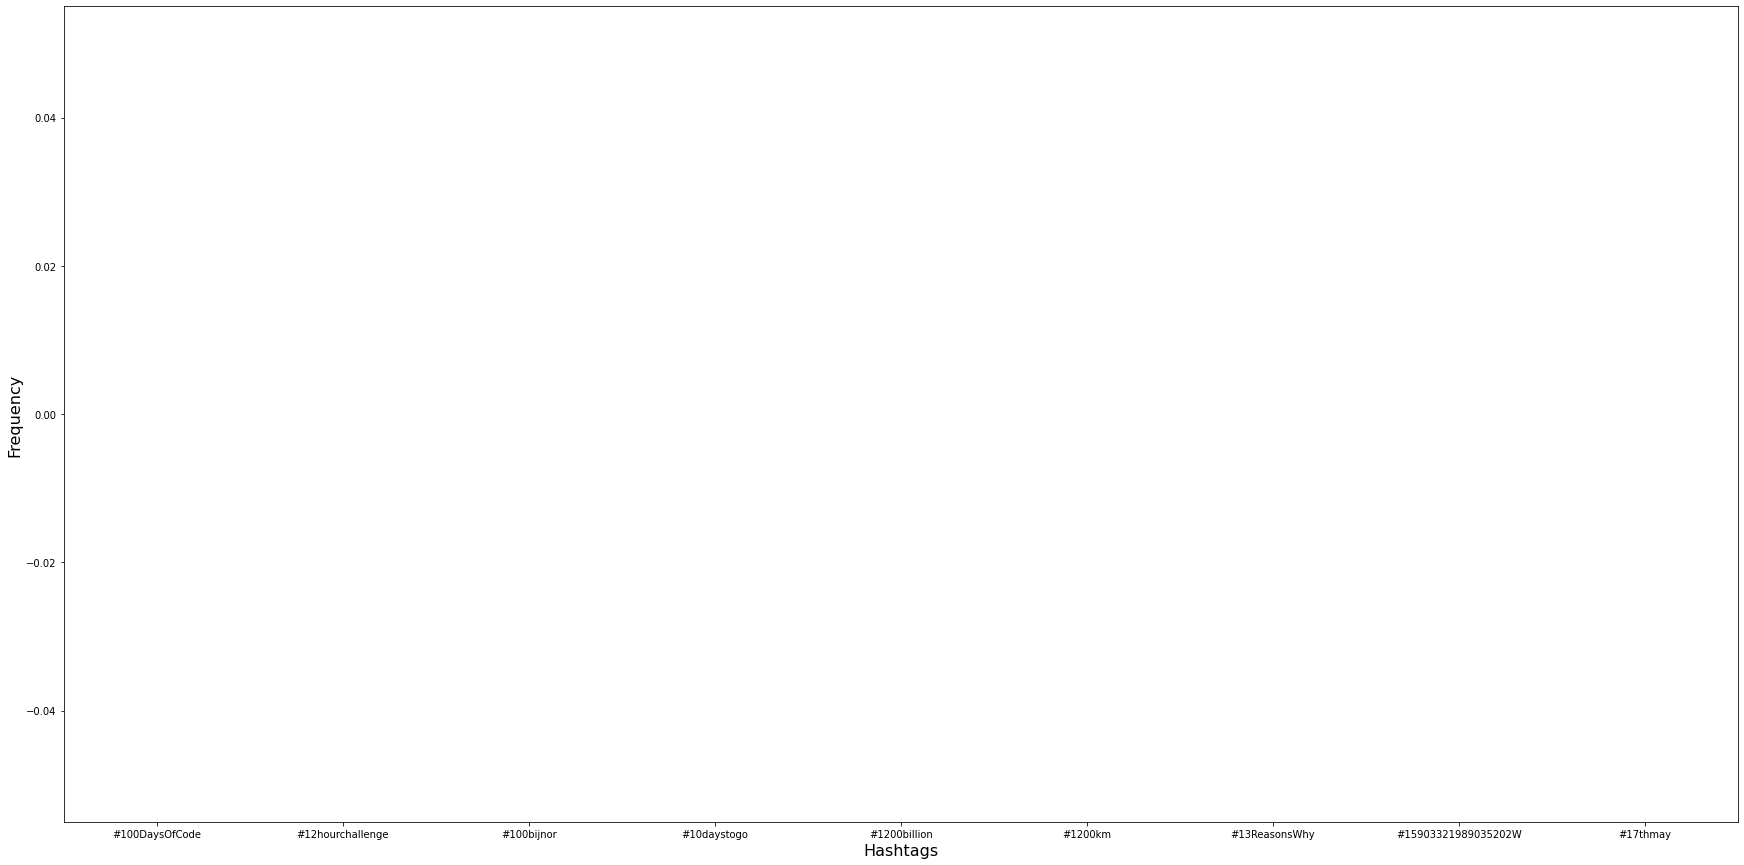

In [34]:
fig = plt.figure(figsize=(30,15))
sns.barplot(hashtag_data.hashtag[1:10],hashtag_data.retweet_count[50:],alpha=0.8)
plt.xlabel("Hashtags",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.savefig('/content/drive/My Drive/Public_Sentiment_Data/Images/hashtag_frequency.png')

In [31]:
hashtag_data.hashtag[1:10]

0         #100DaysOfCode
6       #12hourchallenge
1             #100bijnor
3            #10daystogo
4           #1200billion
5                #1200km
7          #13ReasonsWhy
8    #15903321989035202W
9               #17thmay
Name: hashtag, dtype: object

In [37]:
retweet_count[:10]

NameError: ignored

In [89]:
hashtag_data = pd.read_csv("/content/drive/My Drive/Public_Sentiment_Data/hashtag.csv")
hashtag_data

,hashtag,retweet_count
0,#100DaysOfCode,02
1,#100bijnor,0
2,#100wordsofsolitude,7
3,#10daystogo,0
4,#1200billion,0
...,...,...
16614,印度,0
16615,新型コロナウイルス,0
16616,新型肺炎,0
16617,𝐃𝐄𝐋𝐇𝐈,000011


In [90]:
hashtag_data['retweet_count'] =  pd.to_numeric(hashtag_data['retweet_count'],errors='coerce')

In [91]:
hashtag_data['retweet_count']

0         2.0
1         0.0
2         7.0
3         0.0
4         0.0
         ... 
16614     0.0
16615     0.0
16616     0.0
16617    11.0
16618     0.0
Name: retweet_count, Length: 16619, dtype: float64

In [92]:
hashtag_data

,hashtag,retweet_count
0,#100DaysOfCode,2.0
1,#100bijnor,0.0
2,#100wordsofsolitude,7.0
3,#10daystogo,0.0
4,#1200billion,0.0
...,...,...
16614,印度,0.0
16615,新型コロナウイルス,0.0
16616,新型肺炎,0.0
16617,𝐃𝐄𝐋𝐇𝐈,11.0


In [93]:
hashtag_data["retweet_count"] = hashtag_data[hashtag_data["retweet_count"] > 50]

In [94]:
hashtag_data

,hashtag,retweet_count
0,#100DaysOfCode,NaN
1,#100bijnor,NaN
2,#100wordsofsolitude,NaN
3,#10daystogo,NaN
4,#1200billion,NaN
...,...,...
16614,印度,NaN
16615,新型コロナウイルス,NaN
16616,新型肺炎,NaN
16617,𝐃𝐄𝐋𝐇𝐈,NaN
